# Projectile Motion
George Poole grp39@cam.ac.uk

In addition to being acted on by a gravitational force $-m\textbf{g}$, a projectile will experience some kind of drag force $\textbf{F}$ dependent on its velocity $\textbf{v}$. This acts in adirection anti-parallel to $\textbf{v}$, so we may write

$$\textbf{F}=-F(v)\hat{\textbf{v}}~~~,$$

where $v=|\textbf{v}|$. We can analyse $F(v)$ as a Taylor series

$$F(v)=F(0)+vF'(0)+\tfrac{1}{2}v^2F''(0)+\dots~~~.$$

There is no drag force when velocity is zero, so $F(0)=0$. Writing $k_{\text{lin}}=F'(0)$ and $k_{\text{quad}}=\tfrac{1}{2}F''(0)$, we get

$$F(v)\approx k_{\text{lin}}v+k_{\text{quad}}v^2~~~.$$

The case $k_{\text{lin}}\neq 0, k_{\text{quad}}=0$ is pure linear drag, whilst the case $k_{\text{lin}}=0, k_{\text{quad}}\neq0$ is pure quadratic drag. Returning to the equation of motion,

$$m\frac{\text{d}\textbf{v}}{\text{d}t}=-m\textbf{g}-k_{\text{lin}}\textbf{v}+k_{\text{quad}}v\textbf{v}~~~.$$

The zero drag case $k_{\text{lin}}=k_{\text{quad}}=0$ gives the familar solution

$$\textbf{x}=\textbf{x}_0+t\textbf{v}_0-\tfrac{1}{2}t^2\textbf{g}$$

where $\textbf{x}_0, \textbf{v}_0$ are the initial position and velocity. The linear drag case also has an exact solution, found by multiplying through by an appropriate integrating factor:

$$\frac{\text{d}\textbf{v}}{\text{d}t}+\frac{k_{\text{lin}}}{m}\textbf{v}=-\textbf{g}$$

$$\frac{\text{d}}{\text{d}t}(e^{k_{\text{lin}}t/m}\textbf{v})=-e^{k_{\text{lin}}t/m}\textbf{g}$$

$$\textbf{v}=-\frac{m}{k_{\text{lin}}}\textbf{g}+(\textbf{v}_0+\frac{m}{k_{\text{lin}}}\textbf{g})e^{-k_{\text{lin}}t/m}$$

$$\textbf{x}=\textbf{x}_0-\frac{mt}{k_{\text{lin}}}\textbf{g}+\frac{m}{k_{\text{lin}}}(\textbf{v}_0+\frac{m}{k}\textbf{g})(1-e^{-k_{\text{lin}}t/m})~~~.$$

For $k_{\text{quad}}\neq 0$, an exact solution cannot be obtained and numerical integration is necessary.

It also useful to caculate the total time of flight $T$, which is the total time elasped between launch and when the projectile next hits the horizontal ground. In the cases of zero and linear drag, we have

$$T_{\text{zd}}=\frac{2v_0\sin\theta}{g}$$

and the transcendental equation

$$\frac{mgT_{\text{lin}}}{k_{\text{lin}}}=\frac{m}{k_{\text{lin}}}(v_0\sin\theta+\frac{mg}{k_{\text{lin}}})(1-e^{-k_{\text{lin}}t/m})$$

which is to be solved numerically for $T_{\text{lin}}$.

The Python program below plots trajectories for three different cases, zero drag, linear drag and quadratic drag, with initial conditions $\textbf{x}_0=(0,0)$ and $\textbf{v}_0=(v_0\cos\theta,v_0\sin\theta)$.

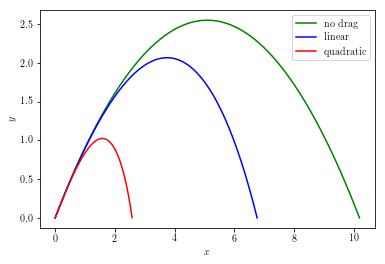

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, solve, exp
from scipy.integrate import odeint

v0=10
theta=45
theta=np.radians(theta)
m=1
g=9.81

k_lin=0.5
k_quad=0.5

T_zd=float(2*v0*np.sin(theta)/g)

x=Symbol('x')
T_lin=solve(-(m*x*g/k_lin)+(m/k_lin)*(v0*np.sin(theta)+(m*g/k_lin))*(1-exp(-k_lin*x/m)))
T_lin=float(T_lin[0])

t=np.linspace(0,T_zd,num=100)
zd_x=v0*np.cos(theta)*t
zd_y=v0*np.sin(theta)*t-0.5*g*t**2
plt.plot(zd_x,zd_y,color='g')

t=np.linspace(0,T_lin,num=100)
lin_x=(m/k_lin)*v0*np.cos(theta)*(1-np.exp(-k_lin*t/m))
lin_y=-(m*t*g/k_lin)+(m/k_lin)*(v0*np.sin(theta)+(m*g/k_lin))*(1-np.exp(-k_lin*t/m))
plt.plot(lin_x,lin_y,color='b')

def quad_dxdt(x,t):
    x1,x2,x3,x4=x
    dx1dt=x3
    dx2dt=x4
    dx3dt=-k_quad*np.sqrt(x3**2+x4**2)*x3/m
    dx4dt=-g-k_quad*np.sqrt(x3**2+x4**2)*x4/m
    return dx1dt, dx2dt, dx3dt, dx4dt

x_0=[0,0,v0*np.cos(theta),v0*np.sin(theta)]
t=np.linspace(0,T_lin,num=1000)
x1,x2,x3,x4=odeint(quad_dxdt,x_0,t).T

for i in range(0,len(x2)):
    if x2[i]>=0:
        index=i
        
plt.rc('text',usetex=True)
plt.rc('font',family='serif')     

plt.plot(x1[0:index+1], x2[0:index+1],color='r')
plt.legend(['no drag','linear','quadratic'])
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.show()

## Related Courses

* Dynamics & Relativity, Part IA Mathematics
* Dynamics, Part IA Physics